# Artificial Neural Networks (ANN)

## Objectives

```
- Classification of data with multi-class labels.
- 
- 
```

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure the backend
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
import seaborn as sns

# load data
iris_data = sns.load_dataset("iris")

# Preprocess the data
condlist = [
    (iris_data["species"] == "setosa"),
    (iris_data["species"] == "versicolor"),
    iris_data["species"] == "virginica",
]
choicelist = [0, 1, 2]
iris_data["target"] = np.select(condlist=condlist, choicelist=choicelist)

iris_data.sample(n=5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species,target
14,5.8,4.0,1.2,0.2,setosa,0
98,5.1,2.5,3.0,1.1,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
16,5.4,3.9,1.3,0.4,setosa,0
131,7.9,3.8,6.4,2.0,virginica,2


In [3]:
iris_data.get("species").value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [4]:
# Convert the data to Torch tensor
X = torch.tensor(iris_data.loc[:, iris_data.columns[:4]].values).float()
y = torch.tensor(iris_data["target"].values).long()

X.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [5]:
# Build model
clf = nn.Sequential(
    # input
    nn.Linear(4, 64),
    # Activation
    nn.ReLU(),
    # Hidden layer 1
    nn.Linear(64, 64),
    # Activation
    nn.ReLU(),
    # Ouput
    nn.Linear(64, 3),
    # Final activation
    nn.Softmax(dim=1),
)
learning_rate, epochs = 0.01, 1_000
# Optimizer
optimizer = torch.optim.SGD(params=clf.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
losses = torch.zeros(size=(epochs, 1))
accuracy_list = []

# Train model
for epoch_idx in range(epochs):
    # Reset the gradients from prev. step loss.backward()
    optimizer.zero_grad()

    # Fwd prop
    _y_pred = clf(X)

    # Compute loss
    loss = criterion(_y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    y_p = torch.argmax(_y_pred, axis=1)
    acc_ = torch.mean((y_p == y).float())
    accuracy_list.append(acc_)

print("Training done ...")

Training done ...


In [6]:
# Make preductions
y_pred_raw = clf(X)

# Evaluate model
y_pred = torch.argmax(y_pred_raw, axis=1)
accuracy = torch.mean((y_pred == y).float())

accuracy

tensor(0.9733)

In [7]:
def visualize_accuracy_n_loss(
    *, accuracy: Union[Sequence, np.ndarray], losses: torch.Tensor
) -> None:
    """This is used to visualize the accuracy and loss per training epoch."""
    _, axs = plt.subplots(1, 2, figsize=(8, 6))

    axs[0].plot(losses.detach())
    axs[0].set(xlabel="Epochs", ylabel="Training Loss", title="Losses")

    axs[1].plot(accuracy)
    axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Accuracy")
    plt.tight_layout()
    plt.show()

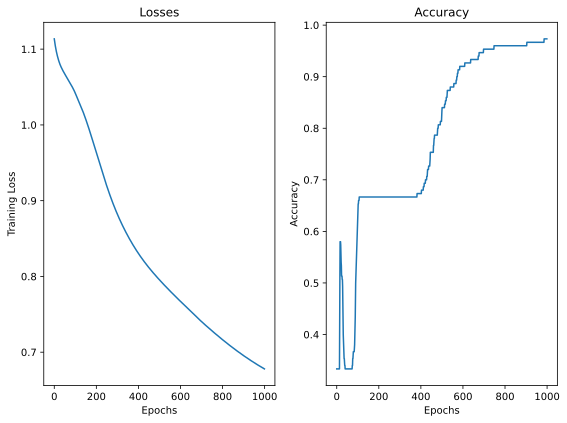

In [8]:
visualize_accuracy_n_loss(accuracy=accuracy_list, losses=losses)

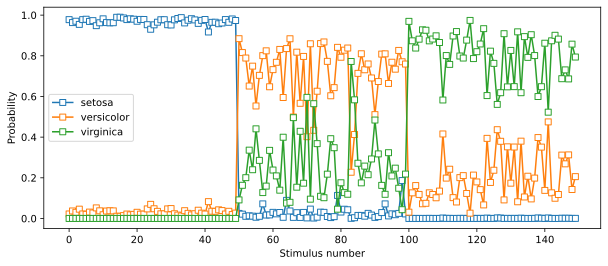

In [9]:
fig = plt.figure(figsize=(10, 4))

plt.plot(_y_pred.detach(), "s-", markerfacecolor="w")
plt.xlabel("Stimulus number")
plt.ylabel("Probability")
plt.legend(["setosa", "versicolor", "virginica"])
plt.show()

### Example 2

In [10]:
# create data
n_clust = 300
blur = 1

A, B, C = [1, 3], [1, -2], [5, -4]

# generate data
a = [A[0] + np.random.randn(n_clust) * blur, A[1] + np.random.randn(n_clust) * blur]
b = [B[0] + np.random.randn(n_clust) * blur, B[1] + np.random.randn(n_clust) * blur]
c = [C[0] + np.random.randn(n_clust) * blur, C[1] + np.random.randn(n_clust) * blur]

a[0].shape

(300,)

In [11]:
# True labels (NumPy)
label_0, label_1, label_2 = (
    np.zeros(shape=(n_clust, 1)),
    np.ones(shape=(n_clust, 1)),
    np.full(shape=(n_clust, 1), fill_value=2.0),
)
# Stack zeros and ones vertically
labels_np = np.vstack((label_0, label_1, label_2))
labels_np.shape

(900, 1)

In [12]:
# Concatenate into a matrix
data_np = np.hstack((a, b, c)).T
data_np.shape

(900, 2)

In [13]:
# Convert data to PyTorch Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).reshape(-1).long()

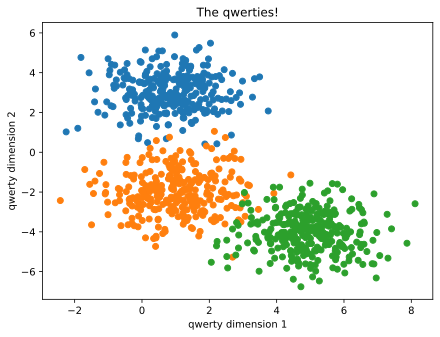

In [14]:
# Visualize data
plt.figure(figsize=(7, 5))

plt.scatter(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1])
plt.scatter(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1])
plt.scatter(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1])

plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")

plt.show()

In [15]:
# Build model
clf = nn.Sequential(
    nn.Linear(2, 64),  # input
    nn.ReLU(),  # Activation
    nn.Linear(64, 64),  # Hidden layer
    nn.ReLU(),  # Activation
    nn.Linear(64, 3),  # Output
    nn.Softmax(dim=1),  # Final activation
)
learning_rate, epochs = 0.01, 1_000
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=clf.parameters(), lr=learning_rate)
losses, accuracy_arr = torch.zeros(size=(epochs,)), torch.zeros(size=(epochs,))

# Train
for epoch_idx in range(epochs):
    # Clear prev gradient
    optimizer.zero_grad()

    # Fwd prop
    _y_pred = clf(data)

    # Compute loss
    loss = criterion(_y_pred, labels)
    losses[epoch_idx] = loss

    # Back prop
    loss.backward()
    optimizer.step()

    # Accuracy
    y_p = torch.argmax(_y_pred, axis=1)
    acc = torch.mean((y_p == labels).float())
    accuracy_arr[epoch_idx] = acc

print("Training done ...")

Training done ...


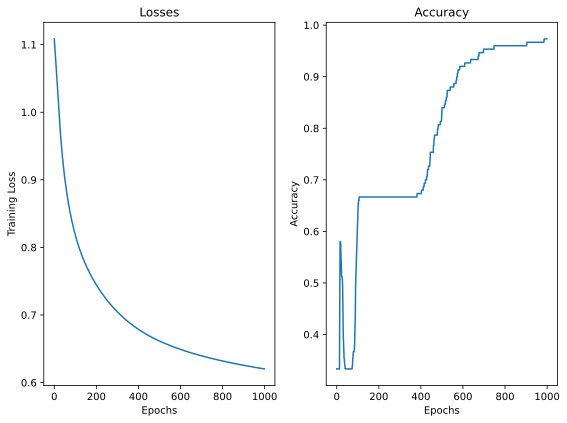

In [16]:
visualize_accuracy_n_loss(accuracy=accuracy_list, losses=losses)